<a href="https://colab.research.google.com/github/marceelrf/scRnaSeqMiniBrain/blob/main/scRNASeq_Descomplicado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Single-Cell RNA-Seq: Porque Cada Célula Conta!**

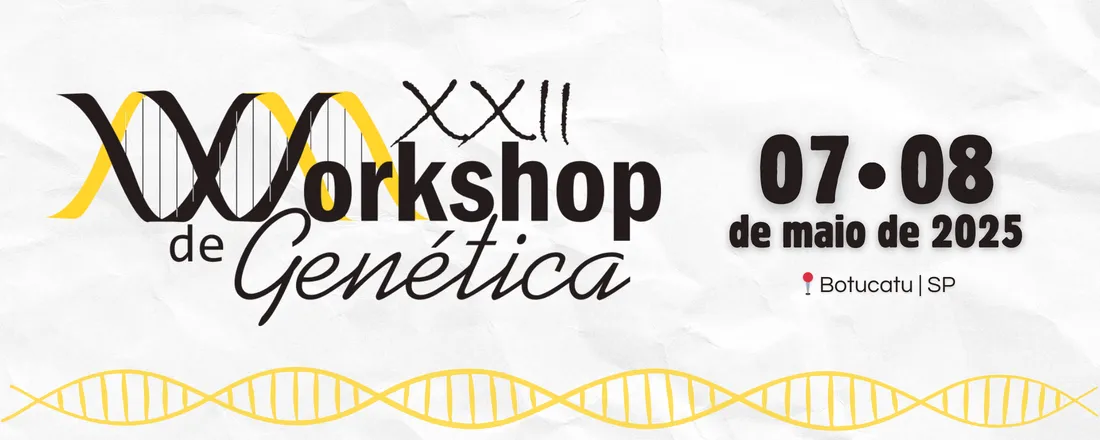

# Introdução ao Google Colab

O Google Colab é um **ambiente de notebook** **Jupyter** negrito hospedado na nuvem que permite que você escreva e execute código Python, R e outros, sem precisar instalar nada na sua máquina local! Ele é uma ferramenta poderosa para aprendizado de máquina, análise de dados e educação.

## Elementos da Interface

- **Células de Código:** Onde você escreve e executa seu código (Python, R, etc.).

- **Células de Texto:** Para adicionar texto, títulos, imagens e equações usando Markdown.

- **Menu:** Acesso a várias opções como salvar, compartilhar, executar e editar seu notebook.

- **Barra Lateral:** Contém arquivos, tabelas de dados e outros recursos.

- **Tempo de Execução:** Indica se o ambiente está executando ou ocioso.

## Principais Vantagens do Google Colab

- **Gratuito:** Acesso gratuito a GPUs e TPUs para treinar modelos de aprendizado de máquina.

- **Fácil de usar:** Interface intuitiva e fácil de usar.

- **Colaboração:** Compartilhe seus notebooks com outras pessoas para colaboração em tempo real.

- **Integração com Google:** Acesso direto ao Google Drive, Google Cloud e outros serviços.

- **Pré-instalado:** Bibliotecas populares de aprendizado de máquina e ciência de dados já instaladas.

In [ ]:
# Conectando o Google Drive

#from google.colab import drive
#drive.mount('/content/drive')

## Demonstração em Código

In [ ]:
# Imprimir "Olá, Mundo!" no Google Colab
print("Olá, Mundo!")

In [ ]:
# Atribuição de variáveis
x = 3
y = 4
z = 5

In [ ]:
x

In [ ]:
y

In [ ]:
x
y

In [ ]:
x+y

In [ ]:
z*y

In [ ]:
# Criar uma lista em Python
minha_lista = [1, 2, 3, 4, 5]
print(minha_lista)

In [ ]:
for i in minha_lista:
  print(i)

# Introdução ao SCANPY e AnnData

**O que é o Scanpy?**

Scanpy é uma **biblioteca Python para análise de dados de scRNA-seq**.

Ele fornece funções para:

- Controle de qualidade (QC) e filtragem de dados;
- Normalização;
- Redução de dimensionalidade (PCA, t-SNE, UMAP);
- Identificação de genes marcadores;
- Análises de Expressão Diferencial (DE);
- Análise de trajetória celular;
- Entre outros...

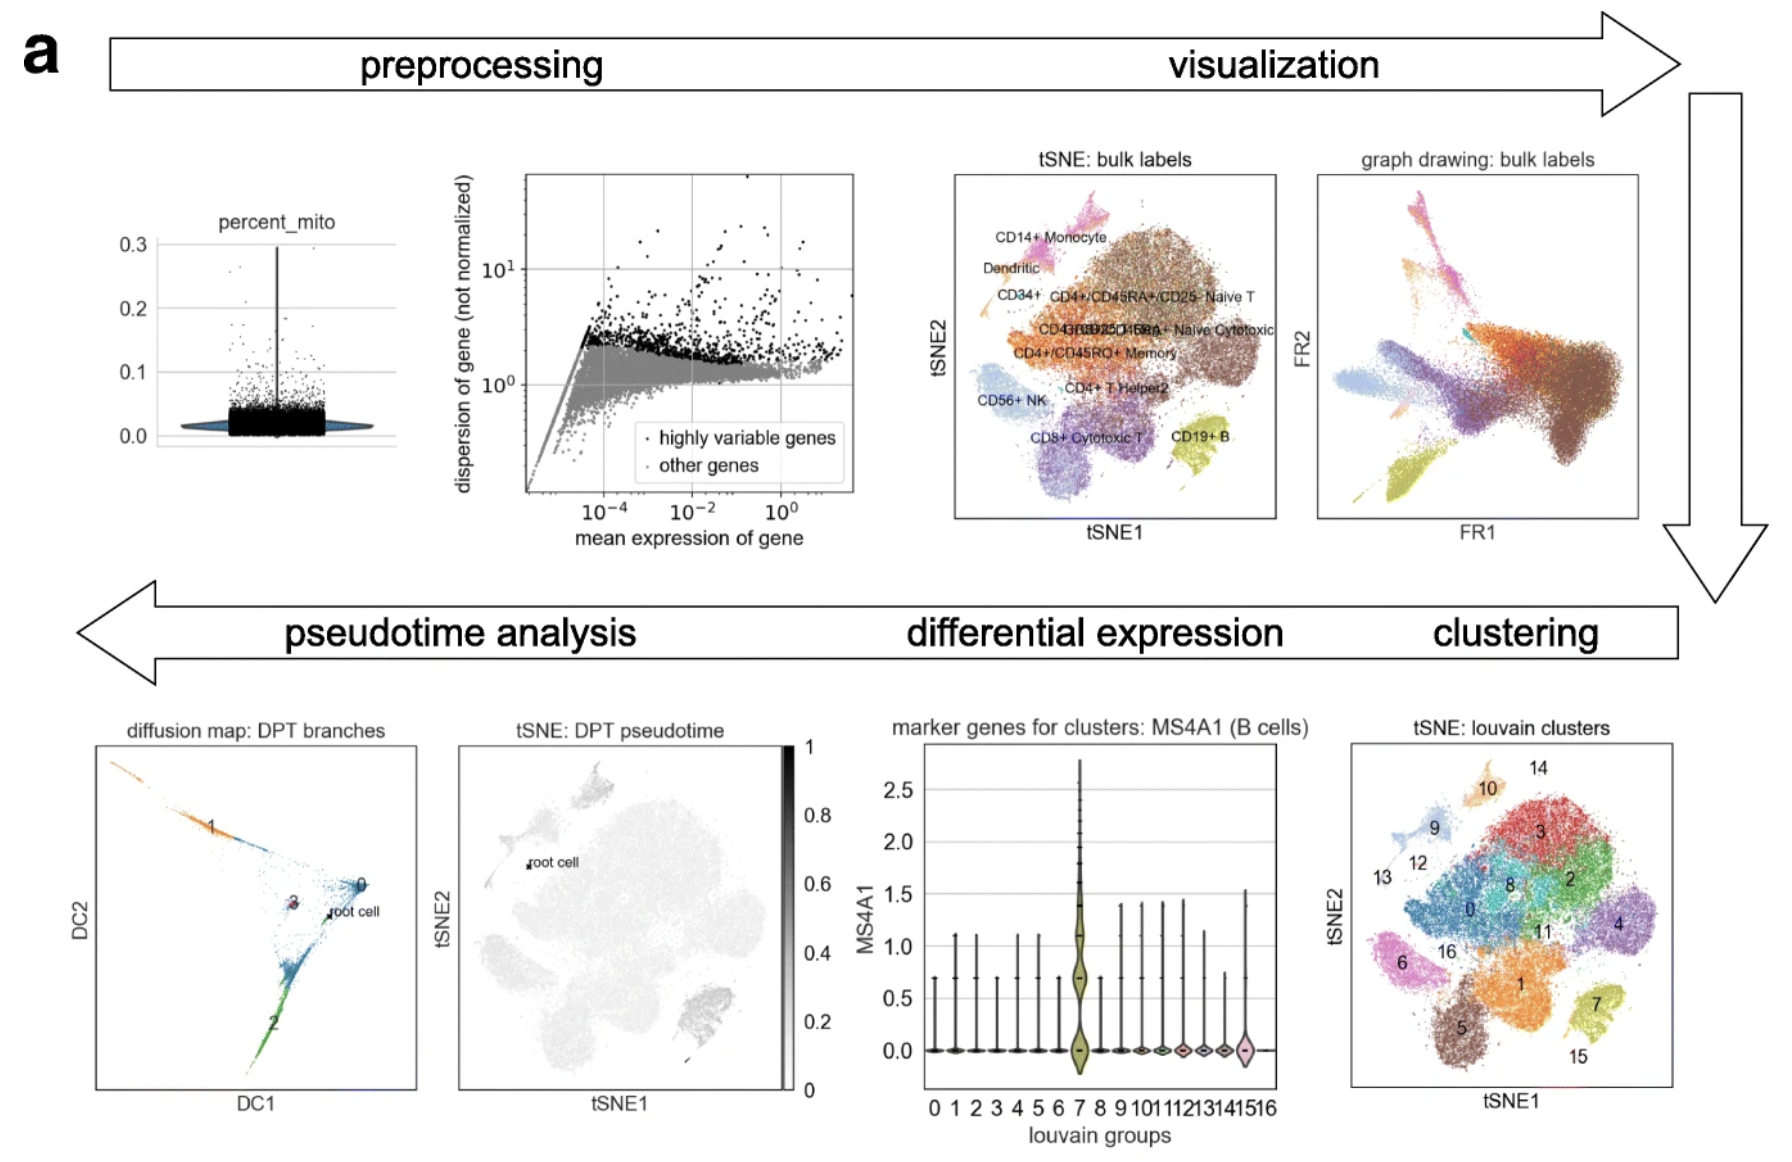

**O que é AnnData?**

AnnData é um pacote em Python para **manipular matrizes de dados** anotadas na memória e no disco. Ele é usado pelo Scanpy e outras ferramentas de análise de RNA de célula única (scRNA-seq). Um objeto AnnData contém:

- **.X**: Uma matriz de expressão gênica, onde as linhas representam células e as colunas representam genes;
- **.obs**: Um DataFrame contendo informações sobre as células (por exemplo, tipo celular, condição experimental);
- **.var**: Um DataFrame contendo informações sobre os genes (por exemplo, nome do gene, função);
- **.uns**: Um dicionário para armazenar resultados de análises e outros metadados;
- **.obsm**, .varm: Matrizes para armazenar dados dimensionais reduzidos, embeddings, etc.

anndata_schema.svg

# Google Colab e Linux: Uma Dupla Poderosa

O Google Colab é executado em um ambiente Linux. Isso significa que você tem acesso a todo o poder e flexibilidade do Linux diretamente do seu notebook Colab.

**Vantagens:**

1. **Acesso ao terminal Linux:** Você pode usar comandos Linux diretamente no Colab, o que abre um leque de possibilidades para gerenciar arquivos, instalar softwares e configurar o ambiente.

2. **Flexibilidade e personalização:** Com o Linux, você tem mais controle sobre o ambiente do Colab. Pode instalar bibliotecas, ferramentas e pacotes específicos que não estão disponíveis por padrão.

3. **Compatibilidade com ferramentas de código aberto:** A grande maioria das ferramentas de ciência de dados e machine learning são de código aberto e rodam em Linux. Isso garante compatibilidade e integração perfeita com o Colab.

4. **Eficiência e desempenho:** Linux é conhecido por sua eficiência e desempenho, o que é crucial para tarefas de processamento intensivo como treinamento de modelos de machine learning.

**Exemplo:**

Para acessar o terminal Linux no Colab, basta clicar no botão "+ Código" e digitar `!` antes do seu comando Linux. Por exemplo, para listar os arquivos no diretório atual, use `!ls`.

# Download do Dataset

In [ ]:
# Wget é uma ferramenta de linha de comando, parte do projeto GNU, utilizada para baixar arquivos da internet usando os protocolos HTTP, HTTPS e FTP

!wget -O Dataset_WG.zip https://www.dropbox.com/scl/fi/450mvmv3i1e5r0udwa24a/Dataset_WG.zip?rlkey=1etbrlfm7645t1pvlst2x1ont&st=r8gvnkpe&dl=1

In [ ]:
# Vamos usar a funcionalidade de descompactar arquivos ZIP

!unzip Dataset_WG.zip

# Instalando os Pacotes Necessários

In [ ]:
# pip install é um comando usado no terminal ou prompt de comandos para instalar pacotes Python

!pip install scanpy
!pip install igraph

In [ ]:
# Em Python, import é uma instrução que permite importar módulos, pacotes ou bibliotecas para um programa.

import scanpy as sc
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Montando o Objeto AnnData no Scanpy


In [ ]:
# Lendo a matriz de expressão

adata = sc.read_mtx("/content/Exp_data_UMIcounts1.mtx")
adata

In [ ]:
# Lendo o arquivo de genes

genes = pd.read_csv("/content/Genes.txt", index_col = 0, header = None, dtype = "str")
genes

Para montar o objeto, vamos precisar remover o nome da coluna de genes, nesse caso, a linha "0"

In [ ]:
# Removendo a linha 0 e observando o arquivo em seguida

genes.index.name = None
genes

In [ ]:
# Lendo o arquivo com metadados

celulas = pd.read_csv('/content/Cells1.csv')
celulas

Agora que temos todos os dados: **Matriz de expressão, genes e células**, vamos montar o objeto AnnData. <br>

Mas antes, vamos precisar transpor a matriz, ou seja, girar ela (transpor). Dessa forma, fazemos o número de células baterem com o tamanho da matriz de expressão.

In [ ]:
# Usando o comando .T podemos transpor a matriz

adata = adata.T
adata.obs = celulas
adata.var = genes

In [ ]:
adata

In [ ]:
# Garantindo que não hajam nomes repetidos em nossa linha de genes

adata.var_names_make_unique()

## Entendendo o dado que estamos usando

A escolha de datasets é uma das partes mais cruciais para uma análise de bioinformática!

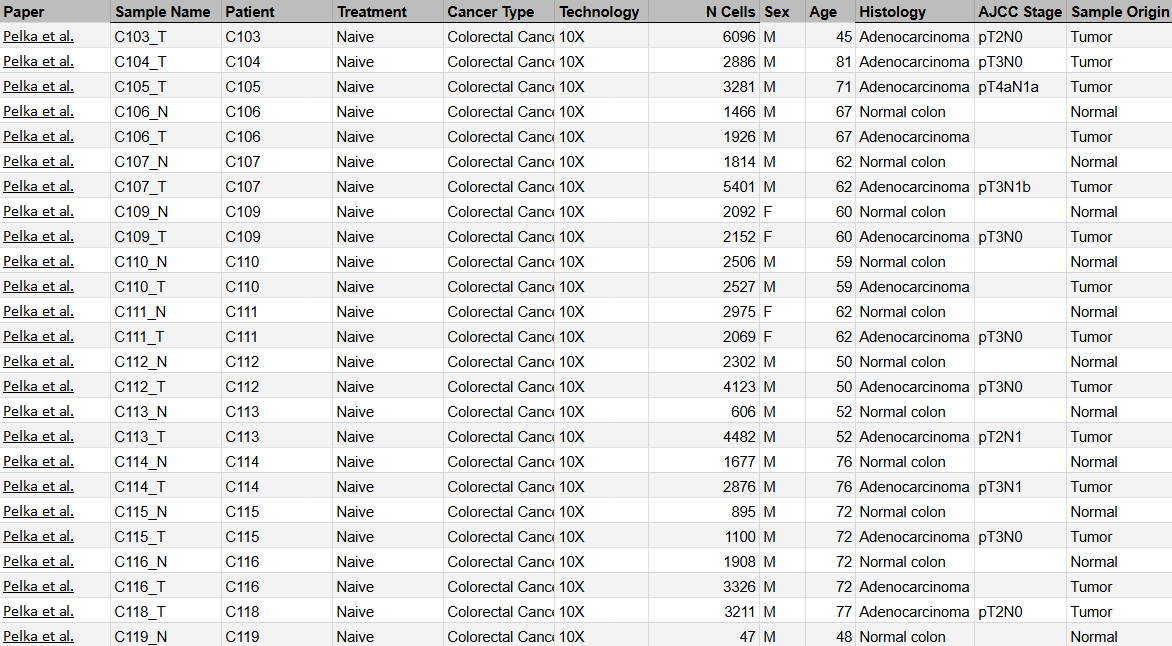

#Pré-Processamento do objeto Anndata

A primeira etapa começa na **visualização** dos nosso genes, nesse caso, nos genes com maiores expressões <br>
Para isso, vamos usar a função `scanpy.plot.highest_expr_genes` que pode ser resumida em: `sc.pl.highest_expr_genes`

In [ ]:
sc.pl.highest_expr_genes(adata, n_top=20)

Na próxima etapa, vamos realizar uma **filtragem** em dois passos: <br>
1. **Remover células com poucos genes:**

  Utilizamos `scanpy.preprocessing.filter_cells` (ou, de forma abreviada, `sc.pp filter_cells`) para eliminar células que tenham menos do que um número mínimo de genes detectados;
2. **Remover genes pouco frequentes:** <br>

  Em seguida, usamos `sc.pp.filter_genes` para descartar genes que aparecem em menos do que um número mínimo de células.

In [ ]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

Em seguida, ocorre o cálculo e **remoção dos genes mitocondriais**; imporante pois eles nos dizem o estado da célula; <br>

Muitos genes mitocondriais podem significar célula morta ou perto de morrer.

In [ ]:
# Removendo os genes com prefixo "MT" - que são os genes mitocondriais

adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [ ]:
# Plotando gráficos de violino para avaliarmos estes parâmetros de qualidade

# Plot violino
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
    show=False  # não mostra ainda para podermos editar
)

# Adiciona linha pontilhada com a média
metrics = ["n_genes_by_counts", "total_counts", "pct_counts_mt"]
means = [adata.obs[m].mean() for m in metrics]

fig = plt.gcf()  # pega a figura atual
axes = fig.get_axes()

for ax, mean in zip(axes, means):
    ax.axhline(mean, color='red', linestyle='--', linewidth=1, label=f"Média: {mean:.1f}")
    ax.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")

Para filtrarmos um objeto anndata, precisamos fazer um "slice". Para isso, precisamos indicar a coluna nas observações que queremos usar e o filtro que vamos aplicar <br>

Por exemplo, se eu tenho uma coluna chamada **cancer_stage** e quero pegar apenas as amostras que estão no nível 4, eu realizo a filtragem com: `adata[adata.obs.cancer_stage == 4]`

In [ ]:
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")

Estes gráficos nos ajudam a determinar o tamanho do nosso dataset.

O primeiro serve para definirmos onde faremos o **cutoff de genes mitocondriais** em nosso dataset, a ideia é selecionar um valor no eixo Y (pct_count_mt) que contenham um alto valor no eixo X (counts). Assim vamos excluir altas contagens de genes mitocondriais ao passo em que preservamos as células com boa qualidade.

 <br>
O segundo serve para o **número de genes** no nosso dataset, a ideia é selecionar o eixo Y (n_genes_by_couts) que também contenha um alto valor no eixo X (counts) .

Antes de realizarmos uma filtragem, vamos ver as colunas que temos no nosso adata.obs com o `adata.obs.keys()`

In [ ]:
adata.obs.keys()

Sabemos que para filtrar, a ideia é realizar um slice, ou seja, dividir o dataset. Podemos fazer isso da seguinte forma:

 `adata[adata.obs.coluna > valor]`
Qual valor você usaria para o pct_count_mt? E para o n_genes_by_counts? Como você faria o slice?

In [ ]:
# Coloque aqui os parâmetros que você considera adequados!

# Número de células antes do filtro
n_celulas_antes = adata.n_obs

# Aplicando os filtros de cutoff
adata = adata[adata.obs.n_genes < 10000, :]
adata = adata[adata.obs.pct_counts_mt < 50, :]

# Número de células depois do filtro
n_celulas_depois = adata.n_obs
n_removidas = n_celulas_antes - n_celulas_depois

# Mensagem informativa
print(f"Com os valores de Cutoff selecionados, {n_removidas} células foram removidas e {n_celulas_depois} foram retidas.")


In [ ]:
# Salvando o objeto filtrado
adata_filtrado = adata.write("adata_filtrado.h5ad")

# Normalização e escalonamento dos dados


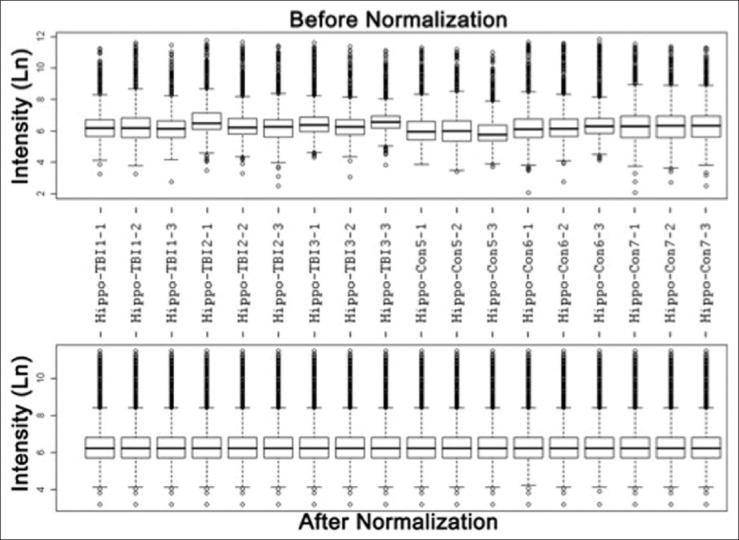

Como diferentes células recebem quantidades distintas de leituras em um experimento de single‑cell, precisamos equalizar seus totais antes de comparar expressão!

In [ ]:
adata = sc.read_h5ad("/content/adata_filtrado.h5ad")

In [ ]:
# Cópia dos dados brutos antes da normalização para vermos o antes e depois
adata_raw = adata.copy()

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)

Para equilibrar a escala dos seus dados e tornar diferenças sutis mais visíveis, aplicamos a transformação logarítmica com pseudoconts de 1 (log(x + 1)).

Isso comprime valores muito altos, espalha melhor os valores baixos e evita o problema do log de zero, preparando os dados para PCA, clustering e outras análises downstream.

É importante lembrar que existem dezenas de métodos de normalização, cada um com suas vantagens e desvantagens!

In [ ]:
sc.pp.log1p(adata)

In [ ]:
# Visualização pré e pós normalização

# PCA antes da normalização
sc.pp.pca(adata_raw, n_comps=30, svd_solver='arpack')
sc.pl.pca(adata_raw, color='sample', title='PCA Antes da Normalização', show=True)

# PCA após normalização
sc.pp.pca(adata, n_comps=30, svd_solver='arpack')
sc.pl.pca(adata, color='sample', title='PCA Após Normalização', show=True)

## Genes Altamente Variáveis

Para focar nos genes que carregam informação sobre diferenças biológicas entre células — e descartar tanto genes quase nunca expressos quanto genes quase sempre presentes — podemos identificar os highly variable genes. Essa etapa reduz o ruído e melhora a separação de subpopulações


In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [ ]:
sc.pl.highly_variable_genes(adata)

Para manter em mão uma versão não transformada dos seus dados (por exemplo, para recuperar contagens brutas em plots ou na seleção de genes variáveis), salvamos tudo em adata.raw antes de qualquer alteração:

In [ ]:
adata.raw = adata.copy()

**Para resumir a maior parte da variação dos seus dados em poucas dimensões e mitigar ruído, aplicamos a Análise de Componentes Principais (PCA).**

 <br>
A PCA calcula novas variáveis — chamadas componentes principais — que são combinações lineares dos genes originais, ordenadas pela quantidade de variação que cada uma explica. <br>

No Scanpy, basta usar: `scanpy.tools.pca` ou `sc.tl.pca`

In [ ]:
sc.tl.pca(adata, svd_solver="arpack")

Para escolher quantos componentes principais (PCs) manter, vamos visualizar a proporção de variância explicada por cada PC. <br>

O gráfico abaixo, com escala logarítmica no eixo y, ajuda a identificar o “cotovelo” (elbow) onde ganhos adicionais de variância ficam pequenos:

Quanto mais PCs decidirmos usar, mais computacionalmente intenso será o cálculo de nossa PCA!


In [ ]:
sc.pl.pca_variance_ratio(adata, log=True)

Para capturar relações de similaridade local entre células, construímos um grafo de vizinhança: <br> Cada célula conecta-se às suas 10 mais próximas no espaço das 30 primeiras componentes principais.

 <br> Esse grafo serve de base para o clustering e para visualizações como UMAP:

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)

Para projetar suas células em um espaço de baixa dimensão que preserve tanto estruturas locais quanto globais, utilizamos o UMAP.



Esse método parte do grafo de vizinhança que construímos e calcula uma embedding em 2D (ou 3D), facilitando a visualização de agrupamentos e trajetórias biológicas:

In [ ]:
sc.tl.umap(adata)

In [ ]:
adata

In [ ]:
sc.pl.umap(adata)

Como podemos ver, esse gráfico de umap está muito cru, podemos colorir ele com qualquer coluna do nosso metadata, no caso, qualquer coluna que está no `adata.obs`

In [ ]:
sc.pl.umap(adata, color = "cell_type")

In [ ]:
sc.pl.umap(adata, color = "sample")

Para agrupar células com perfis de expressão semelhantes, usamos o algoritmo Leiden, que detecta comunidades no grafo de vizinhança de forma robusta e escalável.

In [ ]:
sc.tl.leiden(
    adata,
    flavor="igraph",
    n_iterations=2,
    resolution = 0.5
)

In [ ]:
adata

In [ ]:
sc.pl.umap(adata, color = ["leiden"])

In [ ]:
# Salvando o objeto normalizado
adata_norm = adata.write("adata_norm.h5ad")

# Anotação Celular

## Anotação Manual

In [ ]:
adata = sc.read_h5ad("/content/adata_norm.h5ad")

# Definir os marcadores de diferentes tipos celulares
marker_genes = {
    "Endothelial": ["CDH5", "VWF", "PLVAP","CLDN5","SPARCL1"],
    "Fibroblasts": ["LUM", "DCN", "COL1A1", "COL1A2"],
    "Mesothelial": ["WT1", "KRT19", "CALB2"],
    "Malignant": ["EPCAM", "KRT7"],
    "B Cell": ["CD79A", "CD79B", "MS4A1", "CD19"],
    "T Cell": ["CD3D", "CD3E", "CD2"],
    "Macrophage": ["CD14", "AIF1", "CD68","C1QA", "TREM2"],
    "Dendritic": ["CD1C", "CD207", "FCER1A", "CLEC10A"],
    "Plasm Cell":["SLAMF7", "CD38", "JCHAIN", "MZB1", "XBP1"],
    "Nk Cell": ["NKG7", "GZMB", "KLRD1", "NCAM1"],
    "Epithelial Cell": ["CAPS","KRT15", "KRT17", "CCL19", "KRT19", "EPCAM", "KRT18"]
}

# Criar DotPlot único com todos os marcadores
sc.pl.dotplot(adata, marker_genes, groupby="leiden", standard_scale="var")


In [ ]:
# Identificar os tipos celulares com base na expressão dos genes marcadores
def annotate_clusters_based_on_markers(adata, marker_genes, groupby="leiden"):
    """
    Anota os clusters com base na expressão dos genes marcadores.
    """
    # Inicializar um dicionário para armazenar as anotações
    cluster_annotations = {}

    # Iterar sobre cada cluster
    for cluster in adata.obs[groupby].unique():
        # Filtrar o cluster atual
        cluster_data = adata[adata.obs[groupby] == cluster]

        # Calcular a média de expressão dos genes marcadores para o cluster
        marker_expression = {}
        for cell_type, markers in marker_genes.items():
            expression = cluster_data[:, markers].X.mean(axis=0).mean()  # Média de expressão dos marcadores
            marker_expression[cell_type] = expression

        # Determinar o tipo celular com a maior expressão média de marcadores
        annotated_type = max(marker_expression, key=marker_expression.get)
        cluster_annotations[cluster] = annotated_type

    return cluster_annotations

# Anotar os clusters com base nos genes marcadores
cluster_annotations = annotate_clusters_based_on_markers(adata, marker_genes, groupby="leiden")

# Adicionar as anotações ao objeto AnnData
adata.obs['anotacao_manual'] = adata.obs['leiden'].map(cluster_annotations)

# Verificar as anotações
print("\nAnotações manuais baseadas nos genes marcadores:")
print(adata.obs[['leiden', 'anotacao_manual']].head())

# Salvar o objeto AnnData com as anotações atualizadas
#caminho_salvar = '/content/drive/Shareddrives/CaCaO_Lab/CaCaOMembers/Afonso/Mestrado/DatasetsAfonso/Ovarian/Combined_com_anotacao_manual.h5ad'
#adata.write_h5ad(caminho_salvar)
#print(f"\nObjeto AnnData salvo com sucesso em: {caminho_salvar}")

In [ ]:
sc.pl.umap(adata, color = ["leiden"])
sc.pl.umap(adata, color = ["anotacao_manual"])

In [ ]:
adata.obs

## CellTypist

In [ ]:
!pip install celltypist
import celltypist
from celltypist import models

In [ ]:
# Enabling `force_update = True` will overwrite existing (old) models.
models.download_models(force_update = True)

In [ ]:
models.models_path

In [ ]:
model = models.Model.load(model = 'Human_Colorectal_Cancer.pkl')
model

In [ ]:
predictions = celltypist.annotate(adata, model = 'Human_Colorectal_Cancer.pkl', majority_voting = False)

In [ ]:
predictions.predicted_labels

In [ ]:
adata = predictions.to_adata()

In [ ]:
sc.pl.umap(adata, color= "predicted_labels")

## Vamos comparar as anotações!

In [ ]:
# Cria uma figura com 2 linhas e 2 colunas
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Plot 1: Cell Type com paleta vibrante
sc.pl.umap(
    adata, color="cell_type", ax=axs[0, 0], show=False, title="Cell Type",
    palette="tab20"
)

# Plot 2: Leiden com labels sobre os clusters
sc.pl.umap(
    adata, color="leiden", ax=axs[0, 1], show=False, title="Leiden Clusters",
    legend_loc='on data', legend_fontsize=10
)

# Plot 3: Anotação manual com cores distintas
sc.pl.umap(
    adata, color="anotacao_manual", ax=axs[1, 0], show=False, title="Anotação Manual",
    palette="tab20"
)

# Plot 4: Predição com CellTypist
sc.pl.umap(
    adata, color="predicted_labels", ax=axs[1, 1], show=False, title="CellTypist Prediction",
    palette="tab20"
)

# Layout final
plt.tight_layout()
plt.show()


# Análise de Genes Diferencialmente Expressos (DEGs)

In [ ]:
sc.tl.rank_genes_groups(adata, "leiden", method="wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
adata

In [ ]:
sc.tl.rank_genes_groups(adata, method="wilcoxon", groupby ="anotacao_manual", key_added= "genes_anotacao_manual")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "genes_anotacao_manual")

In [ ]:
adata

In [ ]:
import os

def save_cluster_degs_fixed(
    adata,
    output_dir='cluster_DEGs',
    key='rank_genes_groups',
    pval_threshold=0.05,
    logfc_threshold=1,
    add_gene_symbol=True,
    exist_ok=True
):

    if key not in adata.uns:
        raise ValueError(f"Missing DEGs in adata.uns['{key}']")

    os.makedirs(output_dir, exist_ok=exist_ok)

    # Get clusters directly from DEG results
    result_groups = list(adata.uns[key]['names'].dtype.names)
    deg_dict = {}

    for group in result_groups:
        try:
            df = pd.DataFrame({
                'gene': adata.uns[key]['names'][group],
                'score': adata.uns[key]['scores'][group],
                'logfc': adata.uns[key]['logfoldchanges'][group],
                'pval': adata.uns[key]['pvals'][group],
                'pval_adj': adata.uns[key]['pvals_adj'][group]
            })
        except KeyError as e:
            raise ValueError(f"Group {group} not found in DEG results") from e

        # Apply filters
        if pval_threshold is not None:
            df = df[df['pval_adj'] < pval_threshold]
        if logfc_threshold is not None:
            df = df[df['logfc'].abs() > logfc_threshold]

        # Add gene symbols
        if add_gene_symbol and 'gene_symbol' in adata.var:
            df['gene_symbol'] = adata.var.loc[df['gene'], 'gene_symbol'].values

        # Save results
        if not df.empty:
            safe_name = str(group).replace('/', '_')
            df.to_csv(f"{output_dir}/group_{safe_name}_degs.csv", index=False)
            deg_dict[group] = df
        else:
            warnings.warn(f"No significant DEGs in group {group}")

    print(f"DEGS para {len(result_groups)} grupos foram salvos em {output_dir}/")
    return deg_dict

# Usage with your specific key
genes_manual = save_cluster_degs_fixed(adata, key='rank_genes_groups')

## Vamos fazer uma breve análise comparativa das amostras Tumorais x Normais!

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt

# 1. Criar coluna sample_type a partir de adata.obs['sample']
adata.obs['sample_type'] = adata.obs['sample'].str.endswith('_T').map({True: 'Tumor', False: 'Normal'})

# 2. Pré-processamento para UMAP (você já tinha feito neighbors + umap, mas só reitera aqui)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
sc.tl.umap(adata)

# 3. Plot integrado PCA vs UMAP
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# PCA
sc.pp.pca(adata, n_comps=30, svd_solver='arpack')
sc.pl.pca(
    adata,
    color='sample_type',
    ax=ax1,
    palette={'Normal': '#2ca02c', 'Tumor': '#d62728'},
    title='PCA: Normal vs Tumor',
    show=False,
    legend_loc='lower left'
)

# UMAP
sc.pl.umap(
    adata,
    color='sample_type',
    ax=ax2,
    palette={'Normal': '#2ca02c', 'Tumor': '#d62728'},
    title='UMAP: Normal vs Tumor',
    show=False,
    legend_loc='lower left'
)

plt.tight_layout()
plt.show()

In [ ]:
# 1) Executar rank_genes_groups

sc.tl.rank_genes_groups(
    adata,
    groupby='sample_type',
    method='test-t',
    reference='Normal',
    key_added='N_vs_T'
)

# 2) Extrair resultados em DataFrame
rg = adata.uns['N_vs_T']
df_deg = pd.DataFrame({
    'gene':        rg['names']['Tumor'],
    'logfc':       rg['logfoldchanges']['Tumor'],
    'pval_adj':    rg['pvals_adj']['Tumor']
})

# 3) Filtrar genes significativos (pval_adj < 0.05)
signif = df_deg[df_deg['pval_adj'] < 0.05].copy()

# 4) Selecionar top 100 pelo valor absoluto de logFC
signif['abs_logfc'] = signif['logfc'].abs()
top100 = signif.sort_values('abs_logfc', ascending=False).head(100)['gene'].tolist()

# 5) Print dos top 100 genes para copiar/colar
print("Top 100 DEGs (|logFC| maiores, pval_adj < 0.05):")
print("\n".join(top100))

In [ ]:
import numpy as np

# 6) Preparar dados para o volcano plot
df_deg['neg_log10_padj'] = -np.log10(df_deg['pval_adj'])

# Classificação para cor
def classify(row):
    if row['pval_adj'] < 0.05:
        return 'Up'   if row['logfc'] > 0 else 'Down'
    else:
        return 'NS'
df_deg['regulation'] = df_deg.apply(classify, axis=1)

palette = {'Up': '#d62728', 'Down': '#1f77b4', 'NS': 'gray'}

# 7) Plot do volcano
plt.figure(figsize=(8, 6))
for reg in ['NS','Up','Down']:
    subset = df_deg[df_deg['regulation']==reg]
    plt.scatter(
        subset['logfc'],
        subset['neg_log10_padj'],
        c=palette[reg],
        label=reg if reg!='NS' else None,
        alpha=0.7,
        s=20
    )
# Anotar top100 genes
top_df = df_deg[df_deg['gene'].isin(top100)]
for _, row in top_df.iterrows():
    plt.text(
        row['logfc'],
        row['neg_log10_padj'],
        row['gene'],
        fontsize=6,
        alpha=0.8
    )

plt.axhline(-np.log10(0.05), color='black', linestyle='--', linewidth=1)
plt.axvline( 0,                 color='black', linestyle='-',  linewidth=0.5)

plt.xlabel('log₂ Fold Change (Tumor vs Normal)')
plt.ylabel('-log₁₀(p-adj)')
plt.title('Volcano Plot — Tumor vs Normal')
plt.legend(title='Regulation', loc='upper right')
plt.tight_layout()
plt.show()
